# Laboratorio 1
##### EJERCICIO REGRESIÓN LINEAL.

Tomando los datos de la siguiente tabla sobre los pesos y alturas de una población de 30 personas, crea una gráfica en donde el valor x represente la altura y el valor y represente el peso. Después traza una línea que se apegue lo mas posible a los datos que graficaste.

In [2]:
altura=[152,154,156,161,162,162,163,163,164,167,168,172,175,175,183,183,184,186,187,187,188,192,194,195,
        205,206,206,212,212,220]
peso=[67.25,68.49,63.45,66.09,68.78,67.89,65.8,64.3,67.51,68.34,65.27,67.97,67.01,67.42,68.78,67.19,69.08,
      71.19,68.25,68.61,70.1,68.14,72.18,71.52,69.18,69.88,72.8,74.11,74.03,71.73]

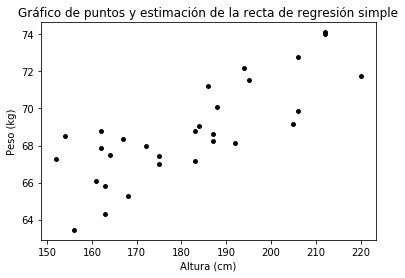

In [4]:
# Se importa librería matplotlib para realizar la gráfica de puntos
import matplotlib.pyplot as plt

plt.scatter(x=altura , y=peso,  marker='o', c='black', s=15)
plt.title("Gráfico de puntos y estimación de la recta de regresión simple")
plt.xlabel("Altura (cm)")
plt.ylabel("Peso (kg)")
plt.show()

Determinacion de la ecuacion de regresion 

In [5]:
# Importamos la librería numpy para la simplificación de operaciones
import numpy as np

# Generar arrays donde se almacenan los datos contenidos en las listas datos_x y datos_ y
array_x = np.array(altura)
array_y = np.array(peso)

# Se generan las estadísticas involucradas en la estimación de la ecuación de regresión
n = len(array_x)
sum_x = sum(array_x)
sum_y = sum(array_y)
sum_xy = sum(array_x*array_y)
sum_xx = sum(array_x*array_x)
sum_yy = sum(array_y*array_y)

In [6]:
# Se obtienen los valores
s_xy = sum_xy-(1/n)*sum_x*sum_y
s_xx = sum_xx-(1/n)*sum_x**2

beta_1 = s_xy / s_xx
beta_0 = (1/n)*sum_y - beta_1*(1/n)*sum_x

# Imprimir los resultados
print("La estimación de los parámetros para el modelo de regresión son: ")
print("beta1: "+str(beta_1))
print("beta0: "+str(beta_0))

La estimación de los parámetros para el modelo de regresión son: 
beta1: 0.10861078195358284
beta0: 49.071633695474354


Estos resultados nos llevan a concluir el siguiente modelo de regresión para los datos dados:
$$ y =  \hat{\beta}_{0} + \hat{\beta}_{1}x = 49.07163 + 0.108610x$$

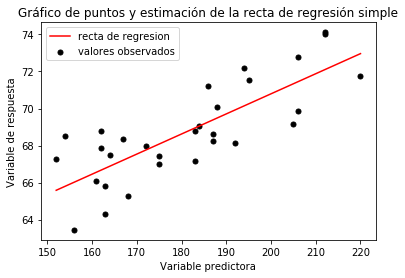

In [9]:
# Se importa librería matplotlib para realizar la gráfica de puntos
import matplotlib.pyplot as plt

plt.scatter(x=altura , y=peso,  marker='o', c='black', s=25)
plt.plot(array_x, beta_0 + beta_1 * array_x, '-', c='red')
plt.title("Gráfico de puntos y estimación de la recta de regresión simple")
plt.xlabel("Variable predictora")
plt.ylabel("Variable de respuesta")
plt.legend(["recta de regresion","valores observados"])
plt.show()



##### EJERCICIO REGRESIÓN LINEAL.

Observa la tabla que se describe a continuación. Utilizando el algoritmo a priori, y la técnica de asociación,
realiza la tabla de relaciones y resuelve cuál es el nivel K de soporte más alto al que podemos llegar con
estos datos teniendo un umbral de 0.5.

In [1]:
# Cargamos las librerias necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Dado que los registros se ecuentran en columnas con y sin articulos, los acomodamos en un arreglo con columnas variables

In [9]:
transactions=[['A','B','C','E'],
             ['B', 'E', 'nan', 'nan'],
             ['C', 'D', 'E', 'nan'],
            ['A', 'C', 'D', 'nan'],
             ['A', 'C', 'E', 'nan']]
transactions

[['A', 'B', 'C', 'E'],
 ['B', 'E', 'nan', 'nan'],
 ['C', 'D', 'E', 'nan'],
 ['A', 'C', 'D', 'nan'],
 ['A', 'C', 'E', 'nan']]

El siguiente paso es cargar la clase Apriori, crear el objeto y entrenarla con el conjunto de datos de transacciones

In [17]:
# Training Apriori on the dataset
#poner en la terminal lo siguiente: pip install apyori
from apyori  import apriori 
rules = apriori(transactions, min_support = 0.003, min_confidence = 0.5, min_lift = 2, min_length = 2)

El objeto contiene las reglas de acuerdo a los grupos frecuentes, par poder visualizar los resultados creamos una lista

In [18]:
# Resultados
results = list(rules)
results

[RelationRecord(items=frozenset({'A', 'B', 'E', 'C'}), support=0.2, ordered_statistics=[OrderedStatistic(items_base=frozenset({'A', 'E'}), items_add=frozenset({'B', 'C'}), confidence=0.5, lift=2.5), OrderedStatistic(items_base=frozenset({'B', 'C'}), items_add=frozenset({'A', 'E'}), confidence=1.0, lift=2.5)])]

Una vez creada la lista, para poder visualizar los grupos frecuentes, creamos una función que nos ayuda a acomodarlos

In [20]:
def inspect(results):
    rh          = [tuple(result[2][0][0]) for result in results]
    lh          = [tuple(result[2][0][1]) for result in results]
    supports    = [result[1] for result in results]
    confidences = [result[2][0][2] for result in results]
    lifts       = [result[2][0][3] for result in results]
    return list(zip(rh, lh, supports, confidences, lifts))

Invocamos la función creando un frame con las reglas encontradas.

In [21]:
# Este comamdo crea un frame para ver los datos resultados
resultDataFrame=pd.DataFrame(inspect(results),
                columns=['rhs','lhs','support','confidence','lift'])

In [22]:
#Imprimimos el frame con las reglas
resultDataFrame

,rhs,lhs,support,confidence,lift
0,"(A, E)","(B, C)",0.2,0.5,2.5
